# Chapter 3 - Regression Models
## Segment 2 - Multiple linear regression

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [8]:
import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

#### (Multiple) linear regression on the enrollment data

In [9]:
address = r'C:\Users\fsabena\OneDrive - MicroStrategy, Inc\Capacitaciones y Cursos\Python for Data Science (Linkedin Learning)\Ex_Files_Python_Data_Science_EssT_Pt2\Exercise Files\Data\enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


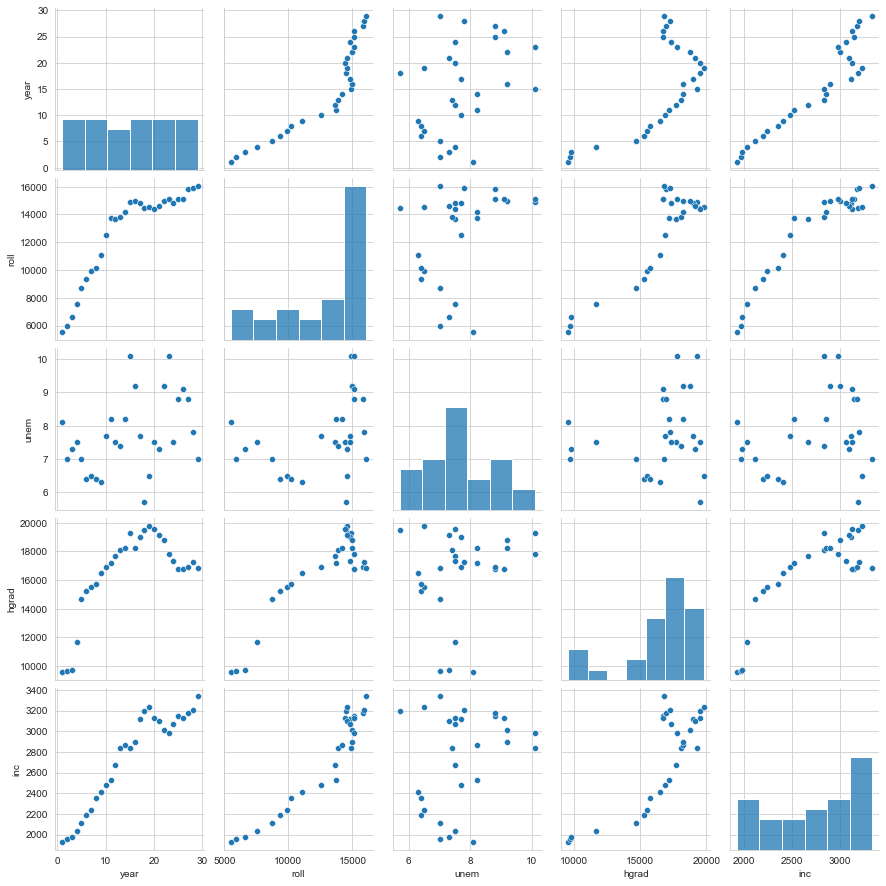

In [10]:
sb.pairplot(enroll)

[Correlación Wikipedia](https://es.wikipedia.org/wiki/Correlaci%C3%B3n)

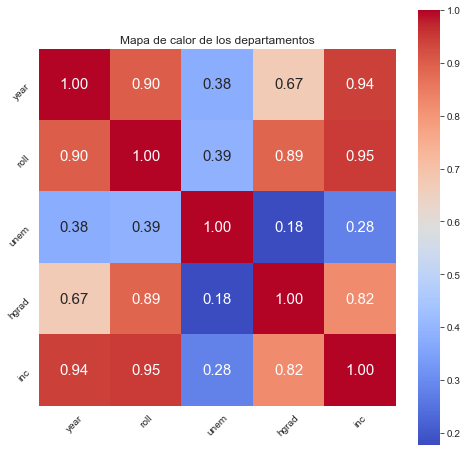

In [13]:
enroll_corr=enroll.corr()

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
enroll.corr(method=histogram_intersection)
plt.figure(figsize=(8,8))
sb.heatmap(enroll_corr, cbar = True, square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Mapa de calor de los departamentos")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [14]:
enroll_data = enroll[['unem', 'hgrad']].values

enroll_target = enroll[['roll']].values

enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target

### Checking for missing values

In [15]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

### Valor de R al cuadrado (R squared value)
[Enlace a Cómo interpretar R-Cuadrado](https://blog.minitab.com/es/analisis-de-regresion-como-puedo-interpretar-el-r-cuadrado-y-evaluar-la-bondad-de-ajuste#:~:text=El%20R%2Dcuadrado%20es%20una,se%20trata%20de%20regresi%C3%B3n%20m%C3%BAltiple.)
* Mientras más se acerque el valor de R a 1, mejor es la predicción del modelo. Y cuando más próximo es a 0, peor es el modelo.

¿QUÉ ES EL R-CUADRADO?

El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como coeficiente de determinación, o coeficiente de determinación múltiple si se trata de regresión múltiple.

La definición de R-cuadrado es bastante sencilla: es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. Es decir:

R-cuadrado = Variación explicada / variación total

El R-cuadrado siempre está entre 0 y 100%:

* 0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
* 100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

En general, cuanto mayor es el R-cuadrado, mejor se ajusta el modelo a los datos. Sin embargo, hay condiciones importantes con respecto a esta pauta de las que hablaré más adelante.

In [16]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.8488812666133723
